In [1]:
import numpy as np
import os
import pandas as pd
import xarray as xr
import glob
import matplotlib.pyplot as plt

os.chdir("C:\\Users\\Greg\\code\\space physics\\experiment\\data")

In [2]:
def clean_data(raw_data, nan_thresh=.1):
    """This function will:
        - remove stations without enough finite data
        - deal with outliers and NaNs
    """
    
    cleaned_data = raw_data.sel(dim_1=['N', 'E', 'Z', 'MLAT', 'MLT'])
    
    # remove stations without enough data
    cond = np.isnan(cleaned_data.sel(dim_1='MLT')).mean(dim='Date_UTC') > nan_thresh
    drop = [st for st in cleaned_data if cond[st]]
    cleaned_data = cleaned_data.drop(drop)
    
    # deal with NaNs
    
    # find outliers
    
    # deal with outliers
    
    return cleaned_data

In [3]:
def estimate_mean(data, old_mean, old_n):
    """this function will recursively estimate mean
    """
    
    mean = data.sel(dim_1=['N','E','Z']).to_array().mean(dim=['variable', 'Date_UTC']).values
    npts = np.isfinite(data.sel(dim_1=['N','E','Z']).to_array()).sum(dim=['variable', 'Date_UTC']).values
    
    total_n = old_n + npts
    
    new_mean = (old_n * old_mean + npts * mean) / total_n
    
    return new_mean, total_n

def estimate_var(data, mean, old_var, old_n):
    """this function will recursively estimate mean
    """
    
    mean = data.sel(dim_1=['N','E','Z']).to_array().mean(dim=['variable', 'Date_UTC']).values
    npts = np.isfinite(data.sel(dim_1=['N','E','Z']).to_array()).sum(dim=['variable', 'Date_UTC']).values
    
    total_n = old_n + npts
    
    new_mean = (old_n * old_mean + npts * mean) / total_n
    
    return new_mean, total_n

In [4]:
def save_data(data, name):
    
    return

In [5]:
def save_metadata(stats):
    mean, std, npts = stats
    np.savez('statistics.npz', mean=mean, std=std, npts=npts)

In [9]:
# estimate statistics

fnames = glob.glob("mag_data*.nc")
calculate_mean = False
if calculate_mean:
    old_mean = 0
    old_n = 0

    for fn in fnames:
        name, ext = os.path.splitext(fn)
        print(name)

        raw_data = xr.open_dataset(fn)

        new_mean = raw_data.sel(dim_1=['N','E','Z']).to_array().mean(dim=['variable', 'Date_UTC']).values
        new_n = np.isfinite(raw_data.sel(dim_1=['N','E','Z']).to_array()).sum(dim=['variable', 'Date_UTC']).values
        total_n = old_n + new_n
        new_mean = (old_n * old_mean + new_n * new_mean) / total_n
        print(new_mean)

        old_mean = new_mean
        old_n = total_n
    
mean = old_mean
var_total = 0
for fn in fnames:
    name, ext = os.path.splitext(fn)
    print(name)
    
    raw_data = xr.open_dataset(fn)
    
    var_total += ((raw_data.sel(dim_1=['N','E','Z']).to_array() - mean)**2).sum(dim=['variable', 'Date_UTC']).values
    
var = var_total / total_n

save_metadata((mean, np.sqrt(var), total_n))

mag_data_2000
mag_data_2001
mag_data_2002
mag_data_2003
mag_data_2004
mag_data_2005
mag_data_2006
mag_data_2007
mag_data_2008
mag_data_2009
mag_data_2010
mag_data_2011
mag_data_2012
mag_data_2013
mag_data_2014
mag_data_2015
mag_data_2016
mag_data_2017


In [30]:
var

array([7.52619027e+07, 5.12598662e+04, 1.41118220e+09])

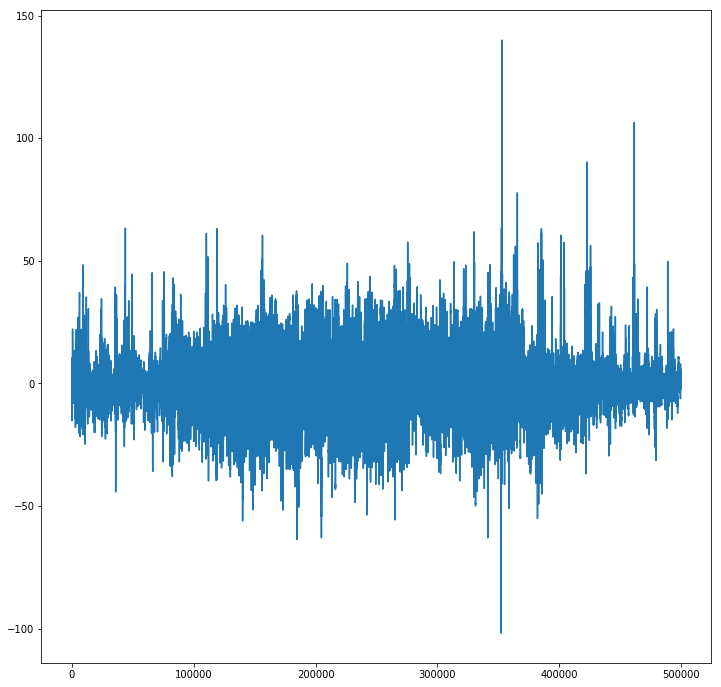

In [33]:
unbiased = raw_data.sel(dim_1=['N','E','Z']).to_array() - mean[None,None,:]
plt.figure(figsize=(12,12))
plt.plot(unbiased[0,:,1])